# Example 6.2: Visualize ASO Components

In [1]:
import molli as ml
from molli.visual._pyvista import draw_wireframe, plot_descriptor
import pyvista as pv
from pyvista.plotting.plotter import Plotter
import h5py
import numpy as np
from tqdm import tqdm
from sklearn.decomposition import PCA

pv.start_xvfb() # Important for rendering due to being run on remote server
lib = ml.ConformerLibrary("bpa_aligned.clib")

In [3]:
with lib.reading():
    keys = list(lib.keys())

with h5py.File("bpa_aligned_grid10.hdf5") as f:
    grid = np.asarray(f["grid"])

DESC_NAME = "aso"

desc_all = np.empty((len(keys), grid.shape[0]))
with h5py.File(f"bpa_aligned_grid10_{DESC_NAME}.hdf5") as f:
    for i, k in enumerate(keys):
        desc_all[i] = f[k]

pca = PCA(n_components=30).fit(desc_all)
desc_pca1 = pca.components_[0]


plt: Plotter = pv.Plotter(off_screen=True)

with lib.reading():
    for k in tqdm(keys[::20]):
        draw_wireframe(lib[k], plt, color_darkness=50, opacity=0.005)

data = pv.PolyData(grid)

desc_norm = desc_pca1 / np.max(np.abs(desc_pca1))

POSITION = [
    (29.96358042372618, 4.0391504855202776, 0.08371776837089945),
    (-0.007199933881796489, 0.27696410129923404, -0.2762142895658706),
    (0.04262366414585409, -0.42601280695171206, 0.9037125159960466),
]

plot_descriptor(
    grid,
    desc_norm,
    plt,
    name=f"PCA({DESC_NAME.upper()}, 1)",
    radius=0.5,
    opacity=0.75,
    factor=1,
    box=False,
    scalar_bar_args={
        "position_x": 0.25,
        "width": 0.5,
        "label_font_size": 16,
    },
)
plt.enable_anti_aliasing("fxaa")

if POSITION is not None:
    plt.camera_position = POSITION

plt.screenshot(
    filename=f"PCA_{DESC_NAME.upper()}_1.png",
    transparent_background=None,
    window_size=(1600, 1200),
    scale=2,
)

# plt.show(auto_close=False) #Currently commented out for render on documentation
# print(plt.camera_position)

100%|██████████| 41/41 [00:03<00:00, 13.27it/s]
/home/blakeo2/miniconda3/envs/dev-blake/lib/python3.11/site-packages/pyvista/core/filters/data_set.py:2322: UserWarning: No vector-like data to use for orient. orient will be set to False.
  warnings.warn("No vector-like data to use for orient. orient will be set to False.")


pyvista_ndarray([[[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 ...,

                 [[255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255],
                  ...,
                  [255, 255, 255],
                  [255, 255, 255],
                  [255, 255, 255]],

                 [[255, 255, 255],
  

wslink is not expecting text message:
> 


Resulting image rendered

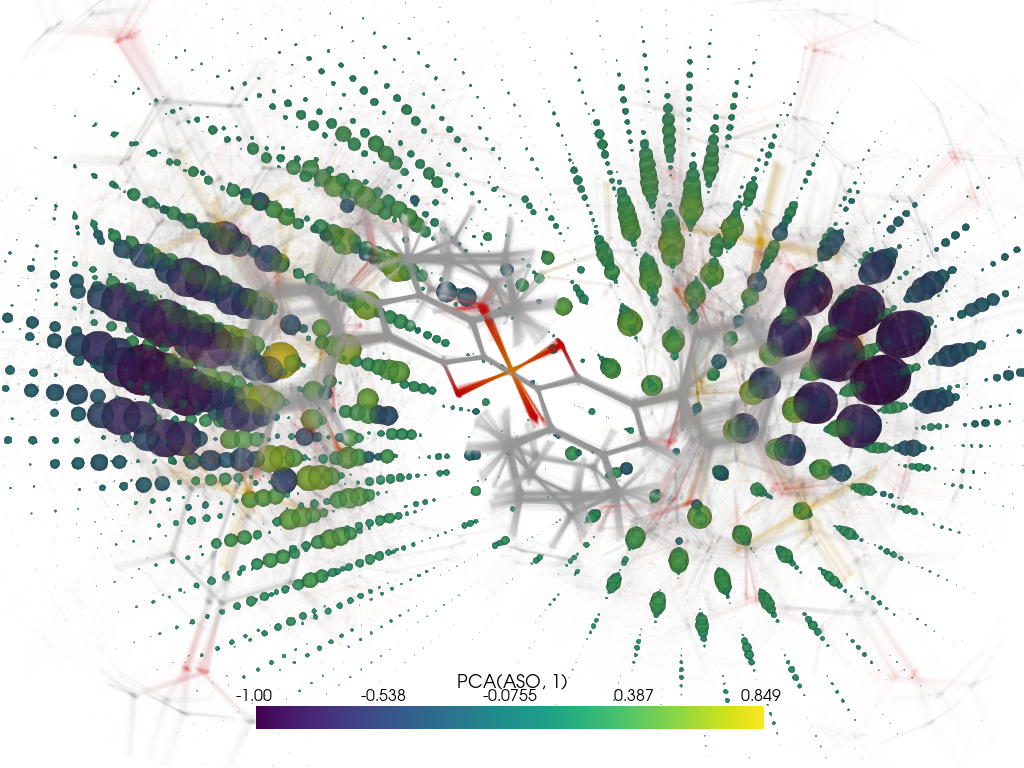